### Desafios:
****************************************************************************************************************************
##### 1 - Criar uma escala de valores em milhões.
##### 2 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).
##### 3- Preço do metro quadrado por bairro e plotar em um gráfico ideal.
##### 4 - Explorar as bibliotecas de visualizações e colocar as suas conclusão.
##### 5 - Pesquisar um visualização para analisar os quartis, mediana e outliers.

In [23]:
#Importando bibliotecas
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # lib para o TreeMap

#Download dos dados
url = 'https://raw.githubusercontent.com/dailys-maite-data-scientist/Imersao_dados_Alura4/main/dados.csv'
dados = pd.read_csv(url)

In [3]:
#limpeza de dados da coluna Valor
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados ["Valor"].str.split(expand = True)
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]

#Correção do valor do anuncio para numérico 
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)
dados_vendas

C:\Users\COPEL3\AppData\Local\Temp/ipykernel_17932/905495260.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)
C:\Users\COPEL3\AppData\Local\Temp/ipykernel_17932/905495260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.0
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0


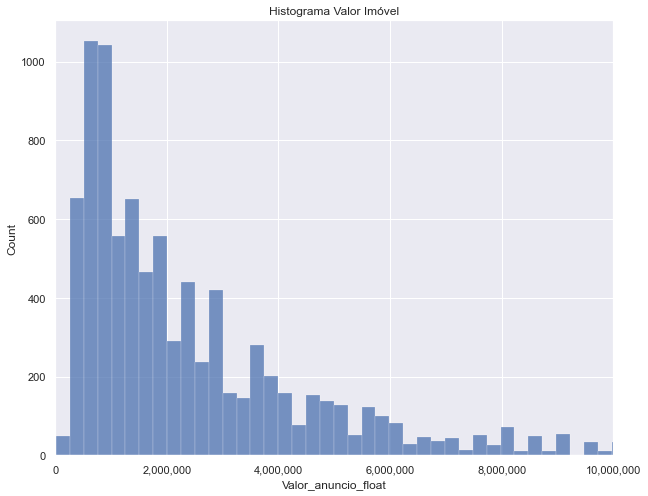

In [4]:
#1 - Criar uma escala de valores em milhões para o plot de valor construido na aula
sns.set()
plt.figure(figsize=(10,8))

ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float") 
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Histograma Valor Imóvel")
plt.xlim(-50, 10000000)
plt.show()

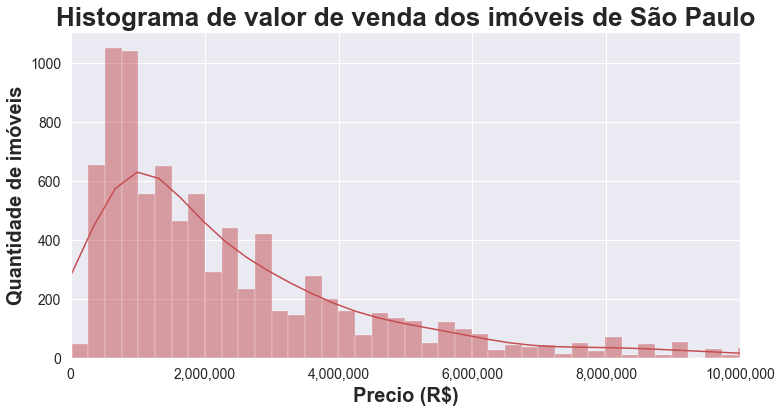

In [5]:
#2 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).
from babel.numbers import format_decimal
sns.set_palette('Accent')
sns.set_style("darkgrid")
plt.figure(figsize=(13,10))

ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True, color = 'r')
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.figure.set_size_inches(12,6)
plt.xlim(-50, 10000000)
plt.title("Histograma de valor de venda dos imóveis de São Paulo", fontsize=26, fontweight="bold")
plt.xlabel("Precio (R$)", fontsize=20, fontweight="bold")
plt.ylabel("Quantidade de imóveis", fontsize=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [6]:
# 3- Preço do metro quadrado por bairro e plotar em um gráfico ideal.
#Primeiro agrupamos e calculamos o total por bairro
valor_m2_bairro = dados_vendas.groupby("Bairro", as_index=False)['Valor_anuncio_float', 'Metragem'].sum()
# Criamos uma variavel e guardamos o calculo do valor por metro quadrado
valor_m2_bairro['valor_m2'] = valor_m2_bairro['Valor_anuncio_float'] / valor_m2_bairro['Metragem']
#Ordenamos 
valor_m2_bairro.sort_values('valor_m2', ascending=False, inplace=True)
valor_m2_bairro

C:\Users\COPEL3\AppData\Local\Temp/ipykernel_17932/1817097846.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  valor_m2_bairro = dados_vendas.groupby("Bairro", as_index=False)['Valor_anuncio_float', 'Metragem'].sum()


,Bairro,Valor_anuncio_float,Metragem,valor_m2
527,Vila Guaca,8.000000e+05,10,80000.000000
103,Jardim América,1.954884e+09,76911,25417.482545
277,Jardim Teresa,4.451000e+07,1945,22884.318766
155,Jardim Europa,2.414173e+09,118898,20304.571145
597,Vila Nova Conceição,4.892650e+08,27837,17576.067823
...,...,...,...,...
120,Jardim Brasília (Zona Leste),9.600000e+05,910,1054.945055
177,Jardim Itapemirim,2.151180e+05,204,1054.500000
453,Vila Aurea,1.650000e+05,182,906.593407
290,Jardim Vera Cruz(Zona Leste),7.000000e+05,1285,544.747082


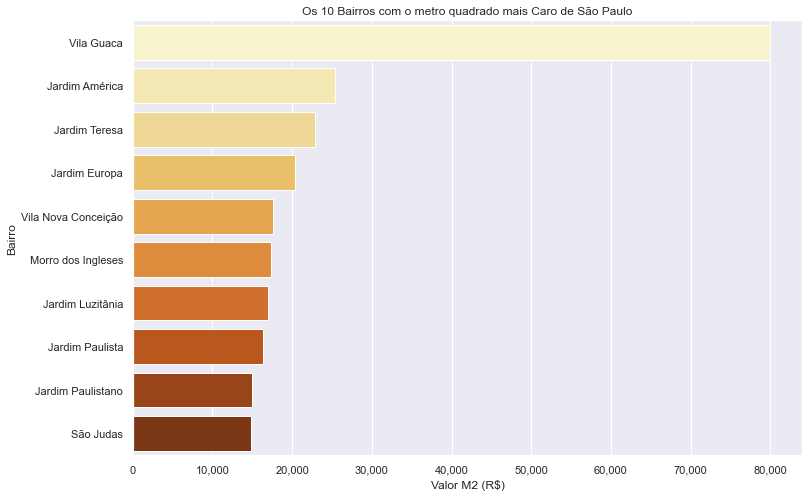

In [7]:
#Plotamos os resultados (os 10 mais caros)
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Bairro',x='valor_m2',data=valor_m2_bairro.head(10), orient='h', palette="YlOrBr")
ax.set_title('Os 10 Bairros com o metro quadrado mais Caro de São Paulo')
ax.set_xlabel("Valor M2 (R$)")
ax.set_ylabel("Bairro")
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

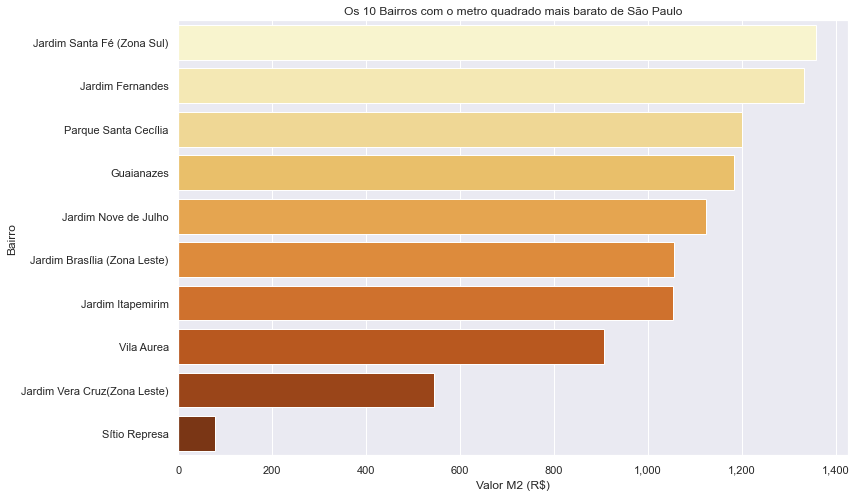

In [8]:
#Plotamos os resultados (os 10 mais baratos)
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Bairro',x='valor_m2',data=valor_m2_bairro.tail(10), orient='h', palette="YlOrBr")
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Os 10 Bairros com o metro quadrado mais barato de São Paulo')
ax.set_xlabel("Valor M2 (R$)")
ax.set_ylabel("Bairro")
plt.show()

C:\Users\COPEL3\AppData\Local\Temp/ipykernel_17932/4232180308.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["valor_m2"] = dados_vendas['Valor_anuncio_float'] / dados_vendas['Metragem']


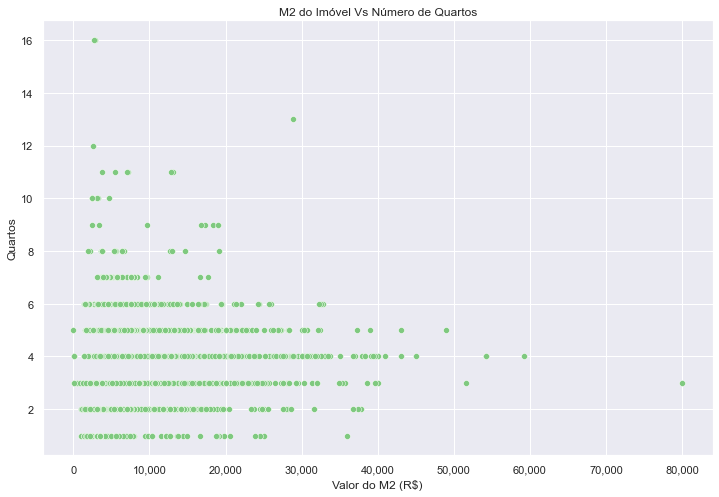

In [14]:
# 4 - Explorar as bibliotecas de visualizações e colocar as suas conclusão.

#Calcular o valor do metro quadrado para cada apto e adicionar na tabela
dados_vendas["valor_m2"] = dados_vendas['Valor_anuncio_float'] / dados_vendas['Metragem']

#Gráfico de dispersão
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="valor_m2", y="Quartos", data=dados_vendas, palette="ch:r=-.2,d=.3_r")
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('M2 do Imóvel Vs Número de Quartos')
ax.set_xlabel("Valor do M2 (R$)")
ax.set_ylabel("Quartos")
plt.show()

In [15]:
#Conclusão: o valor do m2 não é diretamente proporcional à quantidade de quartos do imóvel

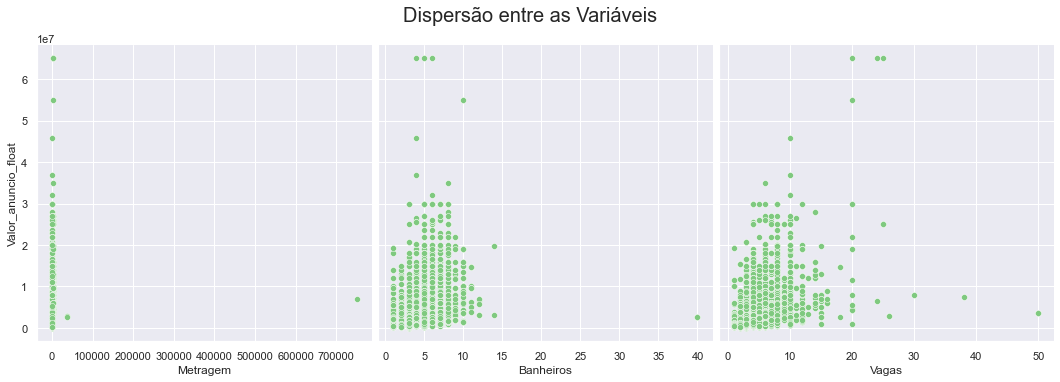

In [36]:
# Plotando mais gráfico de dispersão:

ax = sns.pairplot(dados_vendas, y_vars='Valor_anuncio_float', x_vars=['Metragem', 'Banheiros', 'Vagas'], height=5)

ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)

plt.show()

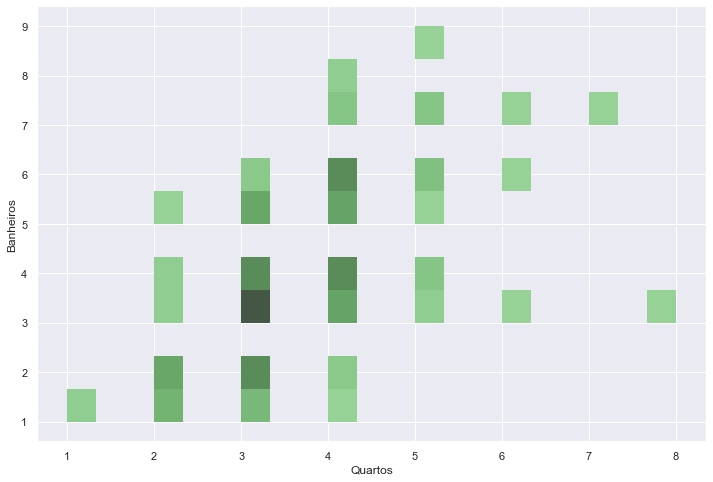

In [17]:
#Propriedades com maior número de quartos tendem a ter mais banheiros.
plt.figure(figsize=(12,8))

data_small = dados_vendas[:200]
sns.histplot(data_small, x="Quartos", y="Banheiros")

plt.show()


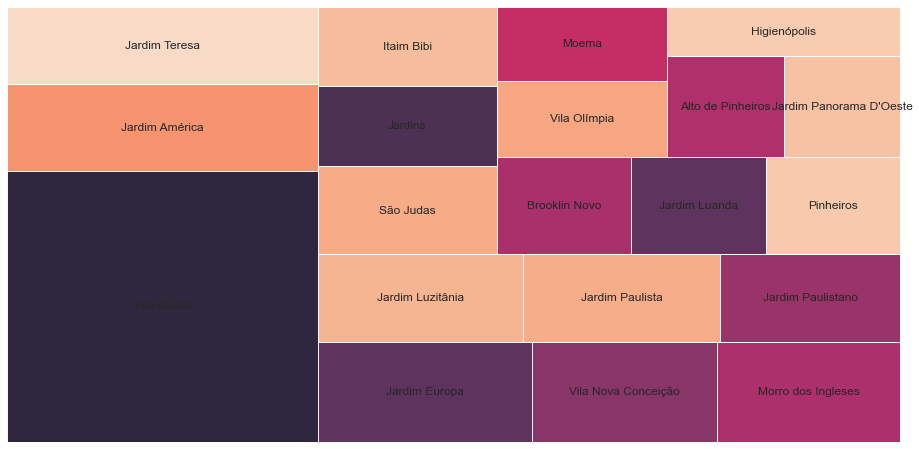

In [30]:
# Plotando um TreeMap:
plt.figure(figsize=(16,8))
squarify.plot(sizes=valor_m2_bairro.head(20)['valor_m2'], label=valor_m2_bairro.head(20)['Bairro'], alpha=.9 )
plt.axis('off')
plt.show()

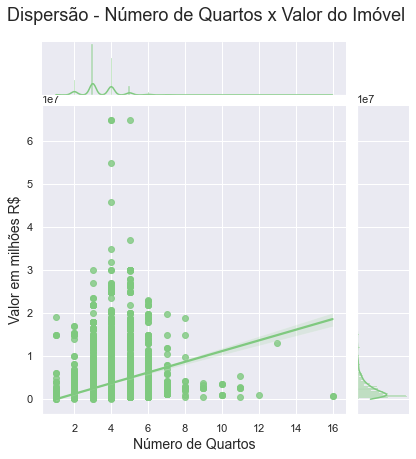

In [37]:
# Mais uma opção de visualização da Dispersão entre duas variáveis, o gráfico Jointplot do Seaborn

ax = sns.jointplot(x='Quartos', y='Valor_anuncio_float', data=dados_vendas, kind='reg')
ax.fig.suptitle('Dispersão - Número de Quartos x Valor do Imóvel', fontsize=18, y = 1.05)
ax.set_axis_labels('Número de Quartos', 'Valor em milhões R$', fontsize=14)
ax
print()

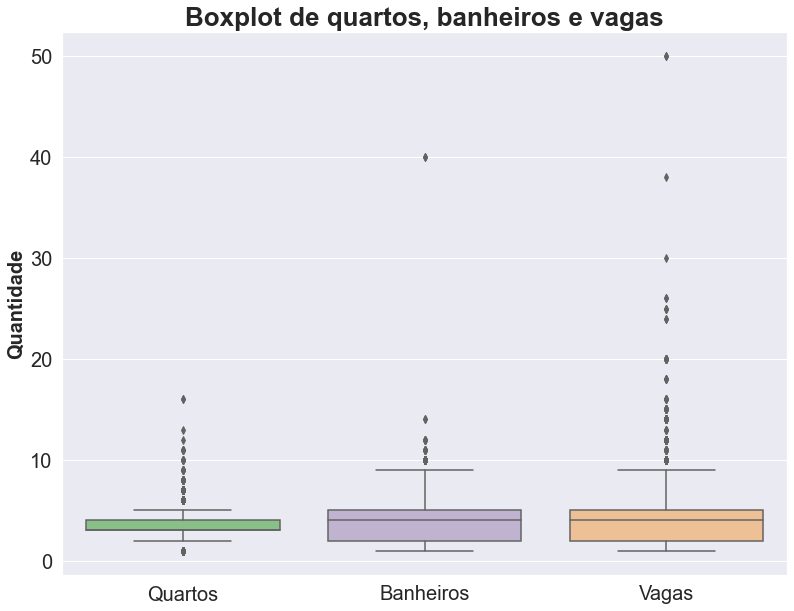

In [38]:
#5 - Pesquisar um visualização para analisar os quartis, mediana e outliers.
# Construindo Boxplots
plt.figure(figsize=(13,10))

ax = sns.boxplot(data=dados_vendas[["Quartos", "Banheiros", "Vagas"]])

plt.title("Boxplot de quartos, banheiros e vagas", fontsize=26, fontweight="bold")
plt.ylabel("Quantidade", fontsize=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()